In [3]:
import numpy as np
import anndata
import pandas as pd
import scanpy as sc
import scipy
#import numpy_indexed as npi
from scipy.sparse import lil_matrix
from sklearn.preprocessing import normalize

In [4]:
Path="/home/mgander/Unrelated/moscotTime_Reproducibility/Data"
ts=['E3.5', 'E4.5', 'E5.25', 'E5.5', 'E6.25', 'E6.5', 'E6.75', 'E7.0', 'E7.25', 'E7.5', 'E7.75', 'E8.0', 'E8.25', 'E8.5a', 'E8.5b', 'E9.5', 'E10.5', 'E11.5', 'E12.5', 'E13.5']

# Transform TOME transition matrix into growth rates

In [5]:
cells=[32, 80, 100, 120, 400, 660, 1720, 4500, 8200, 15000, 30000, 60000, 73000, 90000, 90000, 200000, 1100000, 2600000, 6000000, 13000000]
Cell_number_dict={}
for i in range(20):
    Cell_number_dict[ts[i]]=cells[i]

In [6]:
for i in range(19):
    ts0=ts[i]
    ts1=ts[i+1]
    print(ts0)
    
    M=scipy.sparse.load_npz(f'{Path}/TOME_transport_maps/{ts0}.npz')
    M = normalize(M, norm='l1', axis=0)
    gr=np.asarray(M.sum(1).T)[0]
    gr=gr/gr.mean()*Cell_number_dict[ts1]/Cell_number_dict[ts0]
    np.save(f'{Path}/TOME_transport_maps/{ts0}_growth_rates.npy', gr)

E3.5
E4.5
E5.25
E5.5
E6.25
E6.5
E6.75
E7.0
E7.25
E7.5
E7.75
E8.0
E8.25
E8.5a
E8.5b
E9.5
E10.5
E11.5
E12.5


In [13]:
import seaborn as sns

In [14]:
i=11

In [15]:
ts0=ts[i]
ts1=ts[i+1]
print(ts0)

M=scipy.sparse.load_npz(f'{Path}/TOME_transport_maps/{ts0}.npz')
M = normalize(M, norm='l1', axis=0)
gr=np.asarray(M.sum(1).T)[0]
gr=gr/gr.mean()*Cell_number_dict[ts1]/Cell_number_dict[ts0]

E8.0


<Axes: ylabel='Count'>

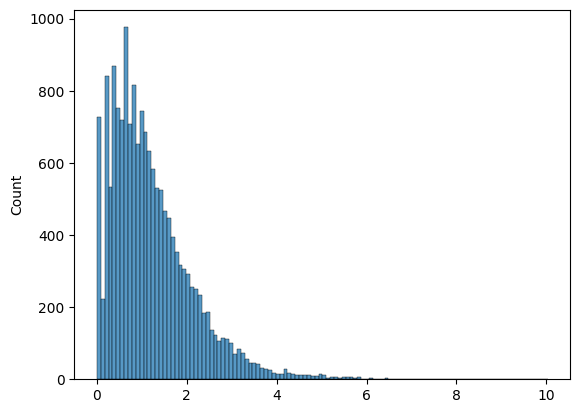

In [16]:
sns.histplot(gr)